GTSRB data set

In [1]:
!pip install --upgrade pip 

In [2]:
!pip install tensorflow

In [16]:
#load libraries 
import numpy as np 
import pandas as pd 
import torch 
import os 
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from PIL import Image
import torchvision.datasets 
import matplotlib
from matplotlib import pyplot as plt
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array,load_img

In [5]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [6]:
# Create transforms
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.3403, 0.3121, 0.3214),
                         (0.2724, 0.2608, 0.2669))
])

In [7]:
class GTSRB(Dataset):
    base_folder = 'GTSRB'

    def __init__(self, root_dir, train=False, transform=None):
        """
        Args:
            train (bool): Load trainingset or test set.
            root_dir (string): Directory containing GTSRB folder.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.root_dir = root_dir

        self.sub_directory = 'trainingset' if train else 'testset'
        self.csv_file_name = 'training.csv' if train else 'test.csv'

        csv_file_path = os.path.join(
            root_dir, self.base_folder, self.sub_directory, self.csv_file_name)

        self.csv_data = pd.read_csv(csv_file_path)

        self.transform = transform

    def __len__(self):
        return len(self.csv_data)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.base_folder, self.sub_directory,
                                self.csv_data.iloc[idx, 0])
        img = Image.open(img_path)

        classId = self.csv_data.iloc[idx, 1]

        if self.transform is not None:
            img = self.transform(img)

        return img, classId

In [8]:
#source:https://pytorch.org/vision/stable/generated/torchvision.datasets.GTSRB.html
# #torchvision.datasets.GTSRB
trainset = torchvision.datasets.GTSRB(
    root='./data', split = 'train', transform=transform, download=True)
testset = torchvision.datasets.GTSRB(
    root='./data', split = 'test', transform=transform, download=True)

In [9]:
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=128, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=128, shuffle=False, num_workers=2)

In [10]:
#for a, b in trainloader:
    #print(a)
    #break

In [11]:
df_trainset = pd.read_csv("data/Train.csv")
df_testset = pd.read_csv("data/Test.csv")

In [12]:
print(df_trainset.info(), df_testset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    12630 non-null  int64 
 1   Height   12630 non-null  int64 
 2   Roi.X1   12630 non-null  int64 
 3   Roi.Y1   12630 non-null  int64 
 4   Roi.X2   12630 non-null  int64 
 5   Roi.Y2   12630 non-null  int64 
 6   ClassId  12630 non-null  int64 
 7   Path     12630 non-null  o

In [13]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

print(classes)

{0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing veh over 3.5 tons', 11: 'Right-of-way at intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Veh > 3.5 tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve left', 20: 'Dangerous curve right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 32: 'End speed + passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right', 37: 'Go straight or left', 38: 'Keep right', 39: 'Keep left', 40: 'Roundabout man

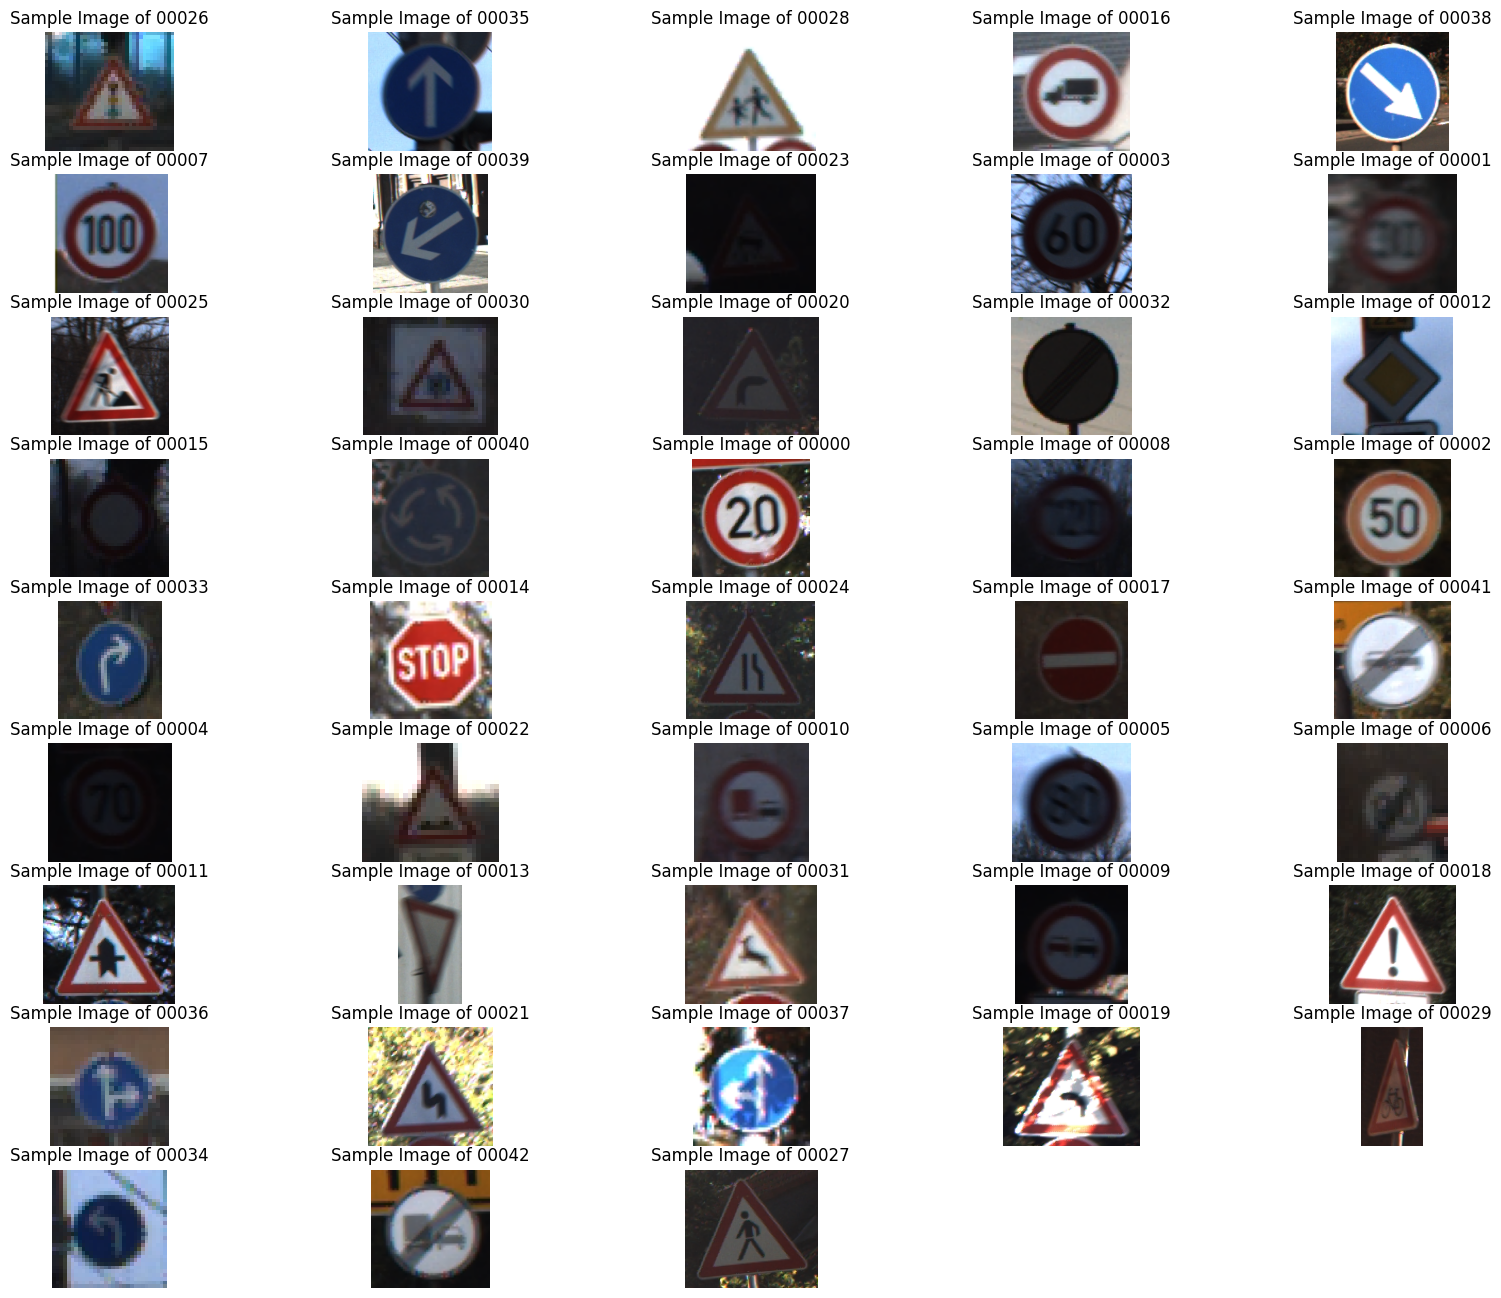

In [14]:
train_data_path = "data/gtsrb/GTSRB/Training"

def plot_images(path):
    count= 1
    fig = plt.figure(figsize=(20, 20))
    for i in os.listdir(path):
        f_path = os.path.join(path,i)
        fig.add_subplot(11,5,count)
        plt.imshow(load_img(f"{os.path.join(f_path,os.listdir(f_path)[0])}"))
        plt.axis('off')
        plt.title(f'Sample Image of {i}')
        count+=1 
    plt.show()
plot_images(train_data_path)